<a href="https://colab.research.google.com/github/BI-DS/ELE-3909/blob/master/lecture4/k_means_stepbystep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.spatial.distance import cdist
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

# K-means Algorithm

Let us code a fairly simple k-means algorithm from scratch

1) generate a simple dataset...

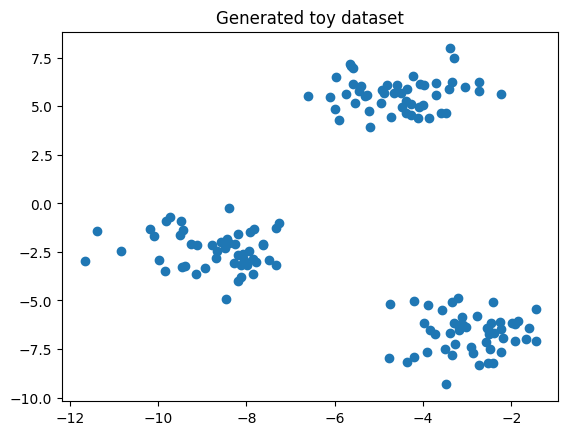

In [ ]:
x, y = make_blobs(n_samples=150, centers=3, n_features=2, random_state=800)
plt.scatter(x[:,0],x[:,1])
plt.title('Generated toy dataset')
plt.show()

the first step is to choose **K** and assign the centroids randomly

In [ ]:
k = 3
rand_idx = np.random.choice(x.shape[0], k)
centroids = x[rand_idx]

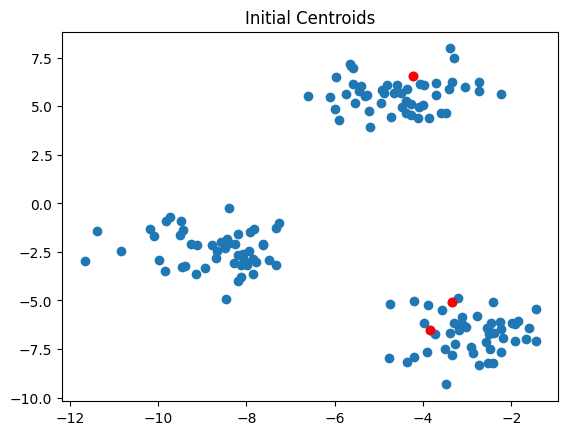

In [ ]:
plt.scatter(x[:,0],x[:,1])
plt.scatter(centroids[:,0],centroids[:,1],color='red')
plt.title('Initial Centroids')
plt.show()

The second step is to calculate distance between all vectors and centroids

In [ ]:
euclidean_dist = cdist(x, centroids)
print(euclidean_dist.shape)
print(euclidean_dist[:5,...])

(150, 3)
[[ 6.69843389  6.72837111 11.47990382]
 [ 2.66273524  1.54269472 14.32114384]
 [ 4.98272777  5.03609046 11.26553897]
 [ 5.85063742  6.26848343  9.81629646]
 [ 5.91383944  6.39479226  9.53460072]]


The third step is the *cluster assignment*, i.e. group vectors according with closest centroid

In [ ]:
labels = np.argmin(euclidean_dist, axis=1)
print(labels.shape)
print(labels[:10])

(150,)
[0 1 0 0 0 0 0 2 2 2]


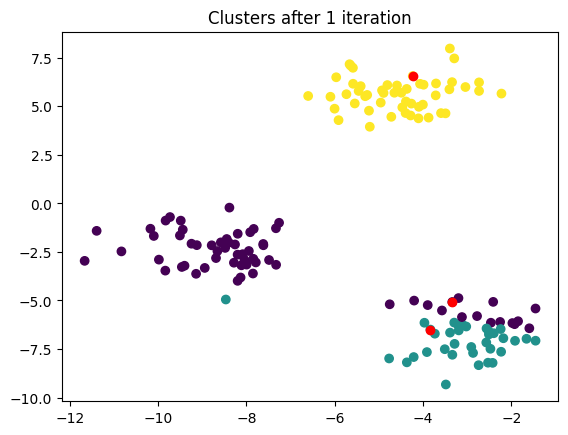

In [ ]:
plt.scatter(x[:,0],x[:,1],c=labels)
plt.scatter(centroids[:,0],centroids[:,1],color='red')
plt.title('Clusters after 1 iteration')
plt.show()

The forth step is to calculate the new centroids

In [ ]:
centroids = []
for i in range(k):
  centroids.append(x[labels==i].mean(axis=0))
centroids = np.array(centroids)
print(centroids)


[[-7.25958141 -3.14450085]
 [-3.1476825  -7.12137035]
 [-4.54744519  5.62842526]]


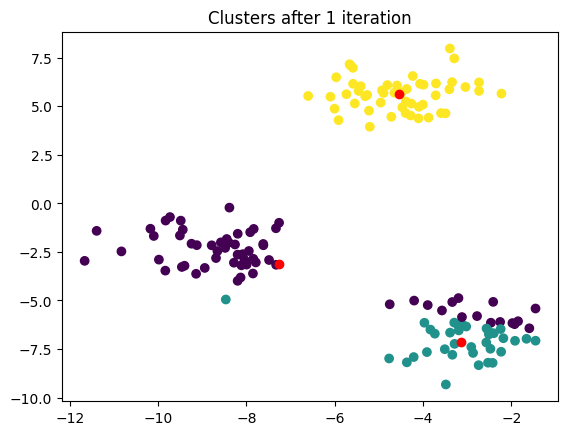

In [ ]:
plt.scatter(x[:,0],x[:,1],c=labels)
plt.scatter(centroids[:,0],centroids[:,1],color='red')
plt.title('Clusters after 1 iteration')
plt.show()